PyBer Summary
1. The highest number of rides are located in urban areas, followed by Suburban and lastly Rural areas.
2. The highest average fare was located in rural areas, which might be a result of fewer drivers that raise demand and cost of uber rides.
3. Urban areas made up at least 62% of the total Uber fares, drivers and rides. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityride = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

# Display the data table for preview
cityride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
cityride_grouped = cityride
rural_groupby = cityride_grouped.loc[cityride_grouped["type"] == "Rural", :]
rural_fare = rural_groupby.groupby("city").agg({"ride_id": "nunique", "fare":"mean", "driver_count": "sum"})
rural_y = rural_fare["fare"]
rural_x = rural_fare["ride_id"]
u = rural_fare["driver_count"]

suburban_groupby = cityride_grouped.loc[cityride_grouped["type"] == "Suburban", :]
suburban_fare = suburban_groupby.groupby("city").agg({"ride_id": "nunique", "fare":"mean", "driver_count": "sum"})
suburban_y = suburban_fare["fare"]
suburban_x = suburban_fare["ride_id"]
v = suburban_fare["driver_count"]

urban_groupby = cityride_grouped.loc[cityride_grouped["type"] == "Urban", :]
urban_fare = urban_groupby.groupby("city").agg({"ride_id": "nunique", "fare":"mean", "driver_count": "sum"})
urban_y = urban_fare["fare"]
urban_x = urban_fare["ride_id"]
x = urban_fare["driver_count"]

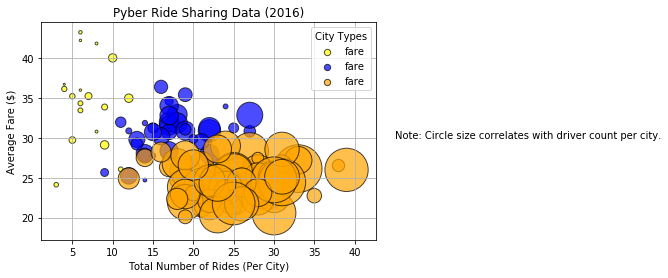

In [14]:
# Incorporate the other graph properties
plt.scatter(rural_x, rural_y, s=u, facecolors="yellow", alpha=0.7, edgecolors="black")
plt.scatter(suburban_x, suburban_y, s=v, facecolors="blue", alpha=0.7,  edgecolors="black")
plt.scatter(urban_x, urban_y, s=x, facecolors="orange", alpha=0.7, edgecolors="black")
plt.grid()

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
inner_legend = plt.legend(title = "City Types", loc="upper right")

inner_legend.legendHandles[0]._sizes = [40]
inner_legend.legendHandles[1]._sizes = [40]
inner_legend.legendHandles[2]._sizes = [40]


# Incorporate a text label regarding circle size
plt.text(45, 30, "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/PyberRideData.png")


In [15]:
# Show plot
plt.show()

## Total Fares by City Type

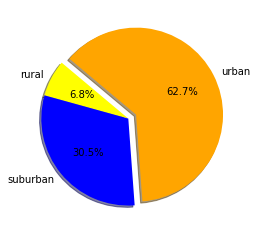

In [16]:
# Calculate Type Percents
total_fare = cityride_grouped.groupby("type").agg({"fare": "sum"})

# Build Pie Chart
pies = ["rural", "suburban", "urban"]
colors = ["yellow", "blue" ,"orange"]
explode = (0, 0, 0.1)
plt.pie(total_fare, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/PieCityType.png")

In [17]:
# Show Figure
plt.show()

## Total Rides by City Type

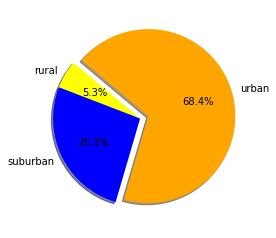

In [18]:
# Calculate Ride Percents
total_ride = cityride_grouped.groupby("type").agg({"ride_id": "count"})

# Build Pie Chart
pies = ["rural", "suburban", "urban"]
colors = ["yellow", "blue" ,"orange"]
explode = (0, 0, 0.1)
plt.pie(total_ride, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/PieRidesType.png")

In [19]:
# Show Figure
plt.show()

## Total Drivers by City Type

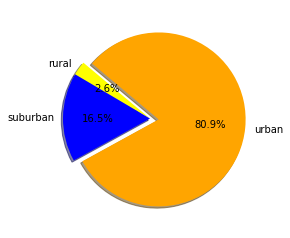

In [20]:
# Calculate Driver Percents
total_drivers = cityride_grouped.groupby("city").agg({"type": "max", "driver_count": "max"})
total_drivers = total_drivers.groupby("type").agg({"driver_count":"sum"})

# Build Pie Charts
pies = ["rural", "suburban", "urban"]
colors = ["yellow", "blue" ,"orange"]
explode = (0, 0, 0.1)
plt.pie(total_drivers, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("Images/PieDriversType.png")

In [21]:
# Show Figure
plt.show()